## **Fake News Classification using Bidirectional LSTM and RNN**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### **Data Describtion**

train.csv: A full training dataset with the following attributes:

id: unique id for a news article
title: the title of a news article
author: author of the news article
text: the text of the article; could be incomplete
label: a label that marks the article as potentially unreliable

1: unreliable
0: reliable
test.csv: A testing training dataset with all the same attributes at train.csv without the label.

submit.csv: A sample submission that you can

### **Objective**

**Our sole objective is to classify the news from the dataset as fake or true news.**

Extensive EDA of news
Selecting and building a powerful model for classification

## **Overview**
1. **Exploratory Data Analysis (EDA)**
  *  Handle Missing Values
  *  Dropping Duplicates
  *  Find the Length of each mail
  *  fake and real news comparision
  *  Plot Word Cloud
  *  Find the Most Common 20 words for each Case
2. **Data Preprocessing**
  *  Removing Punctuations & Digits
  *  Removing links & Numbers
  *  Convert all character to lower cases
  *  Create the Bag of word
  *  Removing Stopwords
  *  Tokenization & Lemmatization
  *  Count Vectorization
  *  TFIDF
3. **Traditional Modelling**
  *  **Logistic Regression**
  *  **Multinomial NB **
  *  Hyper parameter tuning
  *  SVM(Support Vector Machine)
  *  Precision and Recall comparison
  *  ROC curve
  *  CV random search with hyperparameter Tuning 

4. **Deep Learning Modelling**
 
  *  Word2vec using Keras
  *  Convert to pad_sequences
  *  **Model the Bidirectional LSTM using Tensorflow**
  *  Apply Early stop method
  * Precision and Recall comparision




In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import string 
import re
import warnings
import nltk
import numpy as np
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Read the dataset
url='/content/drive/MyDrive/Fake_Train.csv'
df=pd.read_csv(url)

In [6]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

We have some null values in our data set So, we have to subsitiute some values for the null values pr drop the null values.

**Firstly, we will drop null values and check accuracy.**

**Second part fill Null values with some values then check the accuarcy of the model.**


In [9]:
## Drop null values 
news=df.dropna()


In [10]:
news.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
print("Shape of the data set before drop the null values" + " " + str(df.shape))
print("Shape of the data set After drop the null values" + " " + str(news.shape))

Shape of the data set before drop the null values (20800, 5)
Shape of the data set After drop the null values (18285, 5)


In [12]:
## Reset the index of the data set aftrer drop the null values
news.reset_index(inplace=True)

In [13]:
news['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [14]:
print("unreliable of the data set is"+ " "+str(news.label.value_counts()[1]))
print("reliable of the data set is"+ " "+str(news.label.value_counts()[0]))

unreliable of the data set is 7924
reliable of the data set is 10361


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Reliable vs Unreliable Distribution')

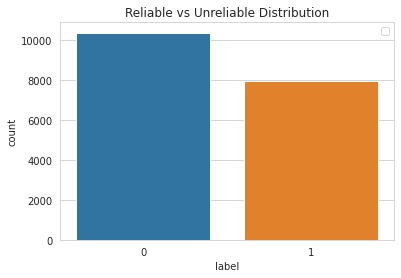

In [93]:
# True vs Non True News Distribution
sns.countplot(news.label)
plt.legend()
plt.title("Reliable vs Unreliable Distribution")

By Visiualizing the distribution of the real and fake news; Those are  have pretty much balanced data But the count of fake news is higher than the true news but not on a greater extent

In [16]:
news.label.value_counts()[0]

10361

In [17]:
#Describe about ham and Spam Mail Behavior in all data set
news.groupby ('label').describe()

index                             ...       id                  
         count          mean          std  ...      50%      75%      max
label                                      ...                           
0      10361.0  10391.956954  5981.636938  ...  10395.0  15564.0  20797.0
1       7924.0  10433.147653  6020.123501  ...  10443.5  15655.5  20799.0

[2 rows x 16 columns]

In [18]:
# Reliable of news
news[news.label == 0].describe()

,index,id,label
count,10361.000000,10361.000000,10361.0
mean,10391.956954,10391.956954,0.0
std,5981.636938,5981.636938,0.0
min,1.000000,1.000000,0.0
25%,5225.000000,5225.000000,0.0
50%,10395.000000,10395.000000,0.0
75%,15564.000000,15564.000000,0.0
max,20797.000000,20797.000000,0.0


In [19]:
# UnReliable of news
news[news.label == 1].describe()

,index,id,label
count,7924.000000,7924.000000,7924.0
mean,10433.147653,10433.147653,1.0
std,6020.123501,6020.123501,0.0
min,0.000000,0.000000,1.0
25%,5197.250000,5197.250000,1.0
50%,10443.500000,10443.500000,1.0
75%,15655.500000,15655.500000,1.0
max,20799.000000,20799.000000,1.0


### **Find word length of each news**

In [20]:
news['Word_length']=news.text.apply(lambda x:len(x.split()))

In [21]:
news.head()

,index,id,title,author,text,label,Word_length
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,820
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,710
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,1266
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,557
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,154


In [22]:
print("Reliable(Real news) news  length description : "+ "\n"+str(news[news['label']==0].describe()))
print("Unreliable(Fake) news  length description :"+ "\n"+str(news[news['label']==1].describe()))

Reliable(Real news) news  length description : 
              index            id    label   Word_length
count  10361.000000  10361.000000  10361.0  10361.000000
mean   10391.956954  10391.956954      0.0    876.219187
std     5981.636938   5981.636938      0.0    726.146513
min        1.000000      1.000000      0.0      1.000000
25%     5225.000000   5225.000000      0.0    400.000000
50%    10395.000000  10395.000000      0.0    773.000000
75%    15564.000000  15564.000000      0.0   1179.000000
max    20797.000000  20797.000000      0.0  14641.000000
Unreliable(Fake) news  length description :
              index            id   label   Word_length
count   7924.000000   7924.000000  7924.0   7924.000000
mean   10433.147653  10433.147653     1.0    707.546189
std     6020.123501   6020.123501     0.0   1052.087161
min        0.000000      0.000000     1.0      0.000000
25%     5197.250000   5197.250000     1.0    200.000000
50%    10443.500000  10443.500000     1.0    433.000000
75%

Text(0.5, 1.0, 'Reliable news length distribution')

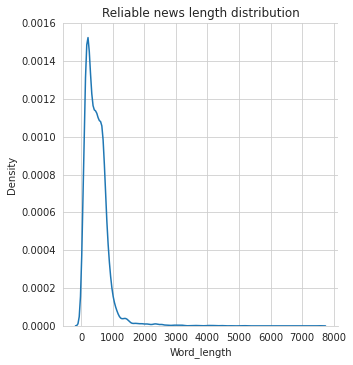

In [94]:
sns.displot(news[news.label==0].Word_length,kind='kde')
sns.set_style(style='whitegrid')
plt.title("Reliable news length distribution")

Text(0.5, 1.0, 'Uneliable news length distribution')

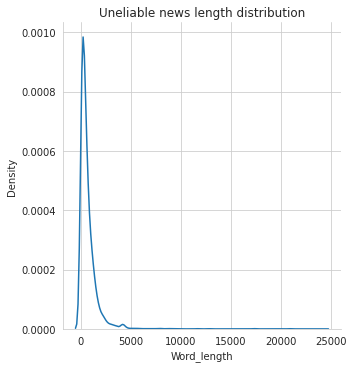

In [24]:
sns.displot(news[news.label==1].Word_length,kind='kde')
sns.set_style(style='whitegrid')
plt.title("Uneliable news length distribution")

### **Data Preprocessing**

**Pre-processing of text**

This is one of the essential steps in any natural language processing (NLP) task. Data scientists never get filtered, ready-to-use data. To make it workable, there is a lot of processing that needs to happen.So the basic steps involved in cleaning the data are

Converting the text from upper case to lower case
Correcting the spelling mistakes
Punctuation removal
removes unwanted characters e.g. hashtag, hyperlinks, stock tickers and number from tweet
Stop words removal
Normalization via lemmatization or stemming Tokenization Now let’s discuss all of these in detail. There are no standard sequences or standard steps that are involved. They vary from example to example. Let us now import the dataset, and analyze it to get a basic understanding of it.

In [25]:
# import text_hammer as th

In [26]:
# from tqdm._tqdm_notebook import tqdm_notebook
# tqdm_notebook.pandas()

# def text_preprocessing(df,col_name):
#     column = col_name
#     df[column] = df[column].progress_apply(lambda x:str(x).lower())
#     df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
#     df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
#     df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
#     df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
#     df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))
#     df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
#     df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
#     df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
#     return(df)
# news['cleaned_text'] = text_preprocessing(news, "text")

In [27]:
#Remove puncuation, newlines and multiple whitespace, lower case everything etc..
ps=PorterStemmer()
corpus=[]
for i in news.index:
  #1.remove except a to z and A to Z 
  review=re.sub('[^a-zA-Z]',' ',news['text'][i])
  #2.Remove all puncuation
  review = re.sub('[\(].*?[\)]', '', review)
  # 2. remove newlines and multiple whitespace, lower case everything
  review = re.sub('\s+', ' ', review)
# 4. remove special characters
  # Regex to keep . , and ' is [^A-Za-z0-9.,\' ]
  review = re.sub('[^A-Za-z0-9 ]', '', review)
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)
  #df['cleaned_text']=np.array(corpus)

In [28]:
#Convert corpus to array  
import numpy as np
news['cleaned_text']=np.array(corpus)

In [29]:
news['Word_length']=news.cleaned_text.apply(lambda x:len(x.split()))

In [30]:
news.head()

,index,id,title,author,text,label,Word_length,cleaned_text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,433,hous dem aid even see comey letter jason chaff...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,367,ever get feel life circl roundabout rather hea...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,692,truth might get fire octob tension intellig an...
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,305,video civilian kill singl us airstrik identifi...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,86,print iranian woman sentenc six year prison ir...


### **Unreliable Cleaned News Analysis**

In [31]:
#Seperate Fake news
unreliable=list(news[news['label']==1]['cleaned_text'])

### **Tokenization for Unreliable Cleaned News**

In [32]:
#Spam mail words
from nltk.tokenize import word_tokenize
all_word_unreliable=[]
for sentence in unreliable:
    words=word_tokenize(sentence)
    for word in words:
        all_word_unreliable.append(word)

### **Find most Twenty common words that appeared in Fake news**

In [33]:
from collections import Counter
counter_unreliable=Counter(all_word_unreliable)
print(counter_unreliable.most_common(20))
coun_unreliable=pd.DataFrame(counter_unreliable.most_common(20))
coun_unreliable.columns=['Common_Words','count']
coun_unreliable.style.background_gradient(cmap='Blues')
coun_unreliable

[('trump', 17304), ('clinton', 17253), ('peopl', 14552), ('one', 14524), ('state', 13832), ('us', 12645), ('would', 12484), ('hillari', 11119), ('like', 11111), ('time', 11033), ('year', 9960), ('elect', 9831), ('said', 9468), ('american', 9097), ('new', 8720), ('also', 8359), ('use', 8312), ('go', 8305), ('presid', 8145), ('govern', 8011)]


,Common_Words,count
0,trump,17304
1,clinton,17253
2,peopl,14552
3,one,14524
4,state,13832
5,us,12645
6,would,12484
7,hillari,11119
8,like,11111
9,time,11033


In [34]:
##Plot Most Common words that appeared in mail
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
fig = px.bar(coun_unreliable, x="count", y="Common_Words", title='Commmon Words in Fake News', orientation='h', 
             width=700, height=700,color="Common_Words")
fig.show()

All the top 20 news are about the US government
Especially it's about Trump and US followed by obama


### **Plot The Word Cloud for Unreliable News**

We extract the most frequently used words in the spam mail and then based on the number of times a word is used. Greater the usage, greater the size of the word in the word cloud.

In [35]:
from wordcloud import WordCloud,STOPWORDS
##Define function for Plot Word Cloud
def plot_wordcloud(text):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im",'mr'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(max_font_size=300,width=800, height=600).generate(str(text))
# Open a plot of the generated image.

    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title('WordCloud of spam mail')
    plt.show()

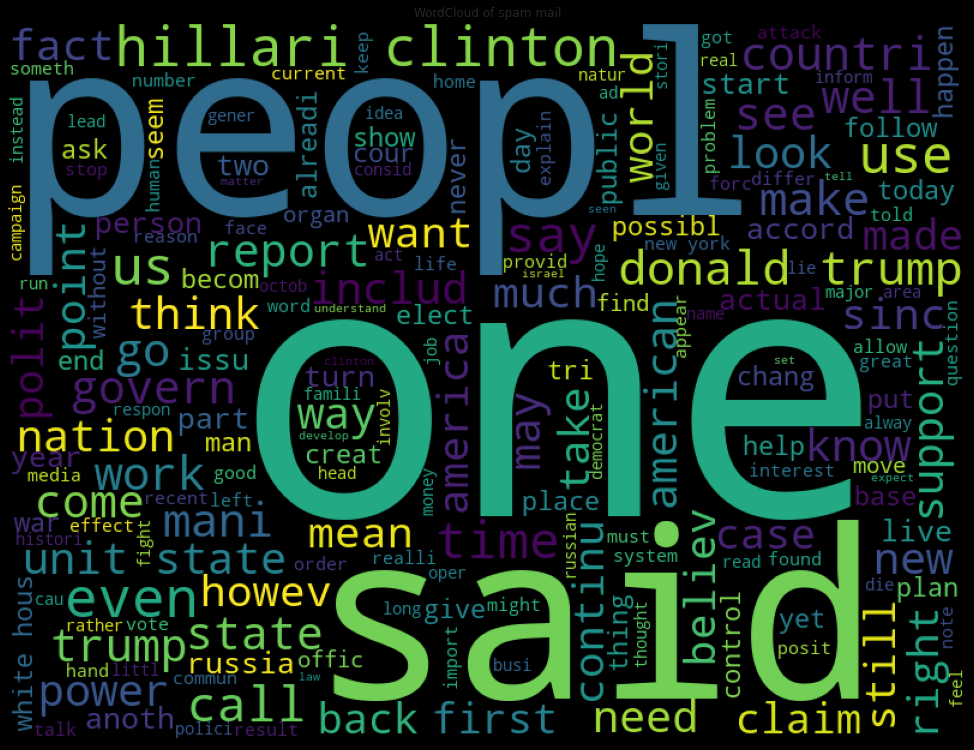

In [36]:
plot_wordcloud(unreliable)

Most of the fake news revolves around Donald Trump and America
There are also fake news about privacy, internet etc.,

### **Most Common words appeared in Reliable news**

In [37]:
## Seperate Reliable news message
reliable=list(news[news['label']==0]['cleaned_text'])

In [38]:
#Reliable  mail words
from nltk.tokenize import word_tokenize
all_word_reliable=[]
for sentence in reliable:
    words=word_tokenize(sentence)
    for word in words:
        all_word_reliable.append(word)
        

In [39]:
from collections import Counter
counter_reliable=Counter(all_word_reliable)
print(counter_reliable.most_common(20))
coun_reliable=pd.DataFrame(counter_reliable.most_common(20))
coun_reliable.columns=['Common_Words','count']
coun_reliable.style.background_gradient(cmap='Blues')
coun_reliable

[('mr', 69201), ('said', 68004), ('trump', 36049), ('one', 23339), ('state', 23305), ('would', 22665), ('year', 21489), ('peopl', 19828), ('new', 19568), ('like', 18982), ('presid', 18388), ('time', 18264), ('also', 15466), ('say', 13392), ('ms', 12377), ('work', 12048), ('american', 11995), ('go', 11877), ('could', 11844), ('report', 11676)]


,Common_Words,count
0,mr,69201
1,said,68004
2,trump,36049
3,one,23339
4,state,23305
5,would,22665
6,year,21489
7,peopl,19828
8,new,19568
9,like,18982


In [40]:
##Plot Most Common words that appeared in mail
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
fig = px.bar(coun_reliable, x="count", y="Common_Words", title='Commmon Words in Real News', orientation='h', 
             width=700, height=700,color="Common_Words")
fig.show()

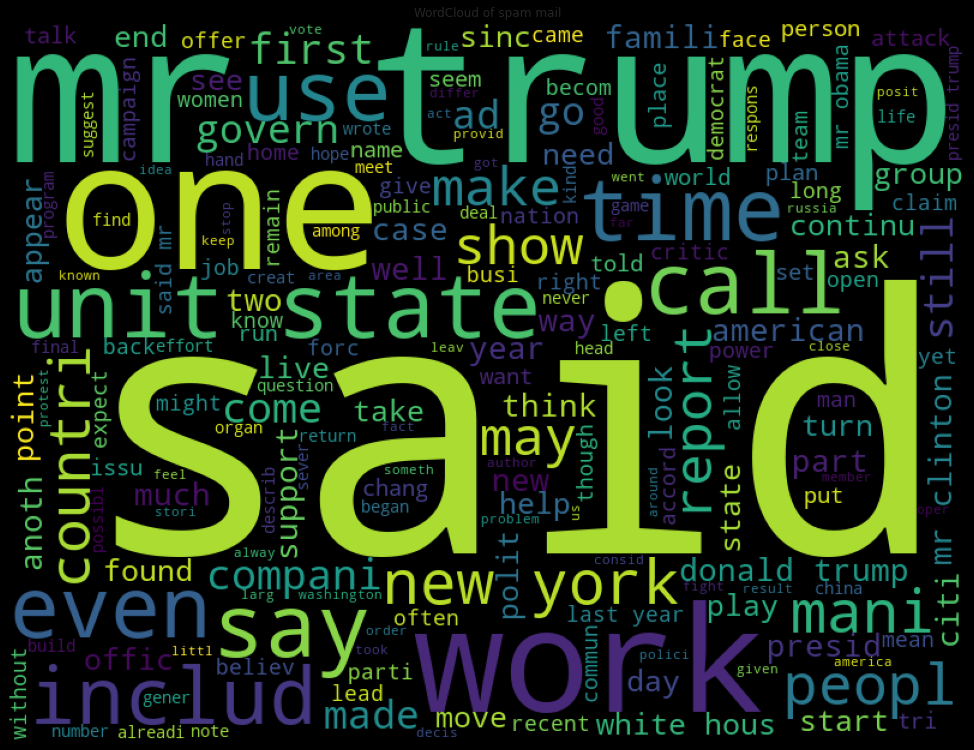

In [41]:
#For ploting use created function
plot_wordcloud(reliable)

In [42]:
#Applying Countvectorizer
#Creating the Bag Of Words model
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
cv=CountVectorizer(max_features=3500,ngram_range=(1,3))
#x=cv.fit_transform(corpus).toarray()

In [43]:
x=cv.fit_transform(corpus).toarray()

In [44]:
print(x.shape)

(18285, 3500)


In [45]:
from sklearn import model_selection

x_train,x_test,y_train,y_test=model_selection.train_test_split(x,news['label'].astype(int),test_size=0.2,stratify=news['label'],random_state=100)
print("Training data set contain " + " " + str(len(x_train))+ " "+ "Observation")
print("Testing data set contain  " + " " + str(len(x_test))+ " "+ "Observation")

Training data set contain  14628 Observation
Testing data set contain   3657 Observation


In [46]:
count_df = pd.DataFrame(x_train, columns=cv.get_feature_names())

In [47]:
count_df

,abandon,abc,abedin,abil,abl,abort,abroad,absolut,abus,academ,academi,acceler,accept,access,accid,accompani,accomplish,accord,accord report,account,accur,accus,achiev,acid,acknowledg,acquir,across,across countri,act,action,activ,activist,actor,actress,actual,ad,adam,adapt,add,addict,...,would allow,would like,would make,would never,would say,would take,wound,wrap,write,writer,written,wrong,wrote,www,xi,yard,ye,yeah,year,year ago,year later,year mr,year old,yemen,yesterday,yet,yet anoth,yield,york,york citi,york time,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,0,0,0,0,3,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14623,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
14624,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,2,0,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
14626,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Logistic Regression Model

**Create the commom function for plot the ROC curve**

In [48]:
def plot_pr_curve(recall, precision, average_precision):
    from inspect import signature
    plt.figure()
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})

    plt.step(recall, precision, color='g', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='g', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
    return plt.show()

**Create the commom function for plot confusion matrix**

In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

### **Create the commom function for develop the traditional model**

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_curve,average_precision_score,roc_auc_score
import itertools
from inspect import signature
from sklearn.metrics import r2_score, roc_auc_score, roc_curve

def modeling(classifier,x_train,y_train,x_test,y_test):
  
  classifier.fit(x_train, y_train)
  # Predicting the Test set results
  predicted = classifier.predict(x_test)
  #Making the confusion Matrix
  cm=confusion_matrix(y_test,predicted)
  average_precision= average_precision_score(y_test,predicted)
  precision, recall,thresholds = precision_recall_curve(y_test,predicted)

  print("Accuracy of the test data set is "+" "+ str(accuracy_score(y_test,predicted)))
  print("average_precision of the tyest data is"+" "+ str(average_precision))
  print("Precision of the tyest data is"+ " "+str(precision[1]))
  print("Recall of the tyest data is"+ " "+str(recall[1]))
  plot_confusion_matrix(cm, classes=['FAKE News', 'REAL News'])
  plot_pr_curve(recall,precision,average_precision)
  #return (average_precision,precision,recall)


Accuracy of the test data set is  0.9518731200437517
average_precision of the tyest data is 0.9163125523041624
Precision of the tyest data is 0.9450410612760581
Recall of the tyest data is 0.9438485804416403
Confusion matrix, without normalization


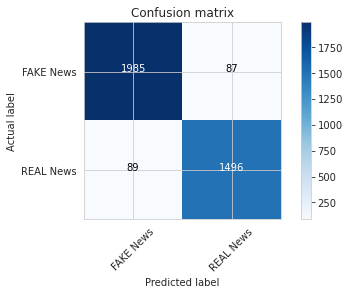

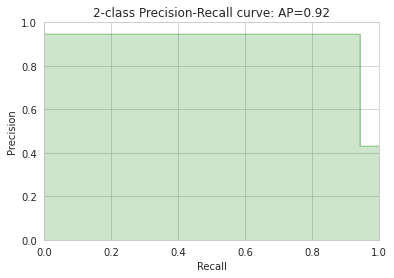

In [51]:
modeling(LogisticRegression(random_state = 100),x_train,y_train,x_test,y_test)

### **MultinomialNB Algorithm**

Accuracy of the test data set is  0.8887065901011758
average_precision of the tyest data is 0.8163529542032454
Precision of the tyest data is 0.8751592356687898
Recall of the tyest data is 0.8668769716088328
Confusion matrix, without normalization


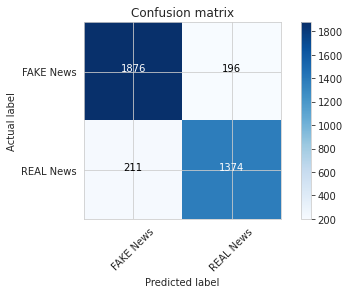

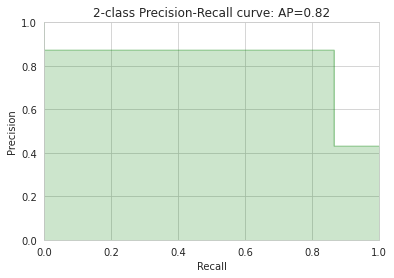

In [52]:
from sklearn.naive_bayes import MultinomialNB
modeling(MultinomialNB(),x_train,y_train,x_test,y_test)

### **Hyperparameter tuning for Multinomial Classifier**

In [53]:
from sklearn import metrics
classifier_tune=MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
  sub_classifier=MultinomialNB(alpha=alpha)
  sub_classifier.fit(x_train,y_train)
  pred_tune=sub_classifier.predict(x_test)
  score_tune = metrics.accuracy_score(y_test, pred_tune)
  if score_tune>previous_score:
    classifier_tune=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score_tune))

Alpha: 0.0, Score : 0.8900738310090238
Alpha: 0.1, Score : 0.8889800382827454
Alpha: 0.2, Score : 0.8889800382827454
Alpha: 0.30000000000000004, Score : 0.8887065901011758
Alpha: 0.4, Score : 0.8887065901011758
Alpha: 0.5, Score : 0.8887065901011758
Alpha: 0.6000000000000001, Score : 0.8887065901011758
Alpha: 0.7000000000000001, Score : 0.8887065901011758
Alpha: 0.8, Score : 0.8887065901011758
Alpha: 0.9, Score : 0.8887065901011758


### **Passive Aggressive Classifier Algorithm**

Accuracy of the test data set is  0.9442165709598032
average_precision of the tyest data is 0.9031292695805644
Precision of the tyest data is 0.9350976685570258
Recall of the tyest data is 0.9362776025236593
Confusion matrix, without normalization


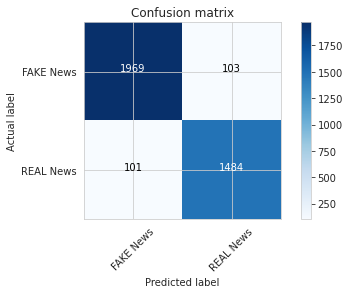

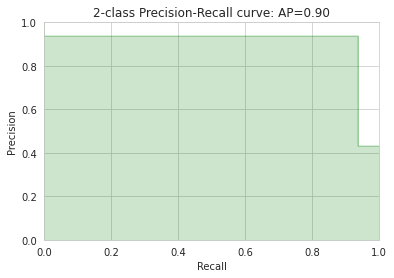

In [54]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
modeling(PassiveAggressiveClassifier(max_iter=50,C = 0.5),x_train,y_train,x_test,y_test)


### **Support vector machines(SVM)**

Accuracy of the test data set is  0.9379272627837025
average_precision of the tyest data is 0.8875996563855276
Precision of the tyest data is 0.9130170316301703
Recall of the tyest data is 0.9470031545741325
Confusion matrix, without normalization


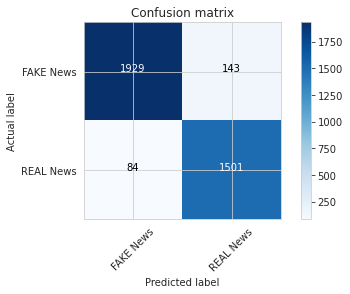

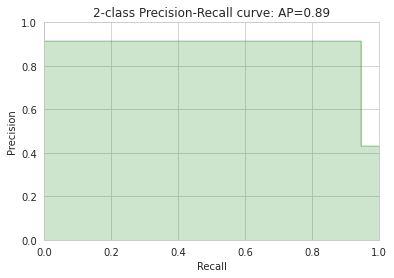

In [55]:
from sklearn.svm import SVC
modeling(SVC(),x_train,y_train,x_test,y_test)

### **Modeling using TF-IDF(Term Frequency-Inverse Document Frequency) method**

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
x_tfidf=cv.fit_transform(corpus).toarray()

In [57]:
x_traintfidf,x_testtfidf,y_train,y_test=model_selection.train_test_split(x_tfidf,news['label'].astype(int),test_size=0.2,stratify=news['label'],random_state=100)

### **Logistic Regression Model**

Accuracy of the test data set is  0.9518731200437517
average_precision of the tyest data is 0.9163125523041624
Precision of the tyest data is 0.9450410612760581
Recall of the tyest data is 0.9438485804416403
Confusion matrix, without normalization


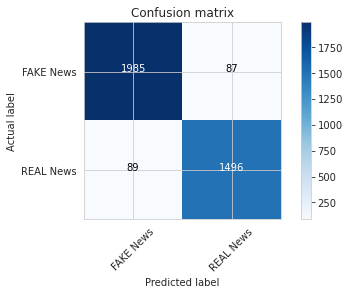

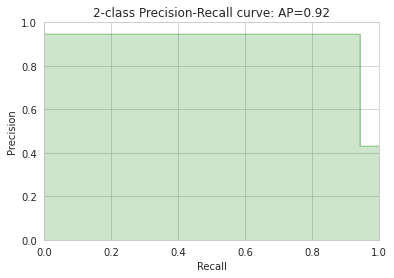

In [58]:
modeling(LogisticRegression(random_state = 100),x_traintfidf,y_train,x_testtfidf,y_test)

### **MultinomialNB**

Accuracy of the test data set is  0.8887065901011758
average_precision of the tyest data is 0.8163529542032454
Precision of the tyest data is 0.8751592356687898
Recall of the tyest data is 0.8668769716088328
Confusion matrix, without normalization


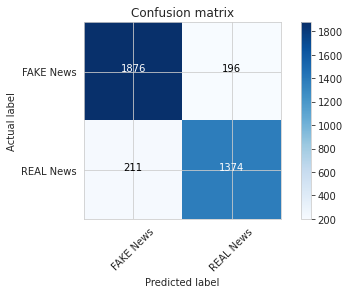

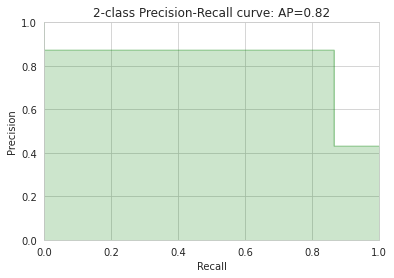

In [59]:
modeling(MultinomialNB(),x_traintfidf,y_train,x_testtfidf,y_test)

### **Support Vector Machines(SVM)**

Accuracy of the test data set is  0.9379272627837025
average_precision of the tyest data is 0.8875996563855276
Precision of the tyest data is 0.9130170316301703
Recall of the tyest data is 0.9470031545741325
Confusion matrix, without normalization


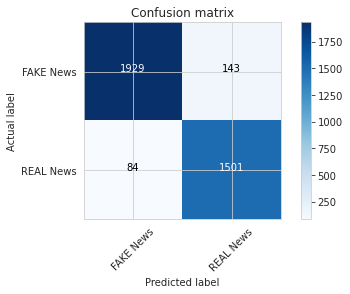

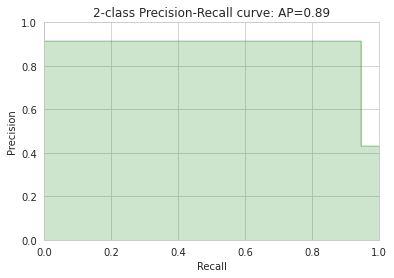

In [60]:
from sklearn.svm import SVC
modeling(SVC(),x_traintfidf,y_train,x_testtfidf,y_test)

In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(x_traintfidf, y_train)

### **Import Deep learning Libraries**

In [62]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Embedding,Dropout
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras import activations

### **Embedding Representation**

In [63]:
x=news['cleaned_text']
y=news['label']

In [64]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [72]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print("Vocab size : ",vocab_size)

Vocab size :  104367


In [66]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(news['cleaned_text'],news['label'].astype(int),test_size=0.2,stratify=news['label'],random_state=100)

In [67]:
X_train_ =tokenizer.texts_to_sequences(x_train)
X_train_pad=pad_sequences(X_train_,maxlen=256,padding='post')
X_test_ = tokenizer.texts_to_sequences(x_test)
X_test_pad = pad_sequences(X_test_, maxlen = 256, padding = 'post')

### **Bidirectional LSTM**

In [68]:
EMBEDDING_DIM = 100 # this means the embedding layer will create  a vector in 100 dimension
model = Sequential()
model.add(Embedding(input_dim = 10,000,# the whole vocabulary size 
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= X_train_pad.shape[1] # max_len of text sequence
                          ))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(128,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(256,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(128,return_sequences=False)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adamax(),metrics = 'accuracy')

In [76]:
history_emd= model.fit(X_train_pad,y_train, epochs = 30, batch_size = 200, validation_data=(X_test_pad, y_test),verbose = 1)

Epoch 1/30
74/74 [==============================] - 60s 804ms/step - loss: 0.0135 - accuracy: 0.9964 - val_loss: 0.3302 - val_accuracy: 0.9275
Epoch 2/30
74/74 [==============================] - 59s 794ms/step - loss: 0.0123 - accuracy: 0.9965 - val_loss: 0.3163 - val_accuracy: 0.9275
Epoch 3/30
74/74 [==============================] - 59s 793ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.2447 - val_accuracy: 0.9423
Epoch 4/30
74/74 [==============================] - 58s 791ms/step - loss: 0.0099 - accuracy: 0.9972 - val_loss: 0.3063 - val_accuracy: 0.9398
Epoch 5/30
74/74 [==============================] - 59s 793ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.2857 - val_accuracy: 0.9396
Epoch 6/30
74/74 [==============================] - 59s 792ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.3137 - val_accuracy: 0.9407
Epoch 7/30
74/74 [==============================] - 58s 791ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.3264 - val_accuracy: 0.9407

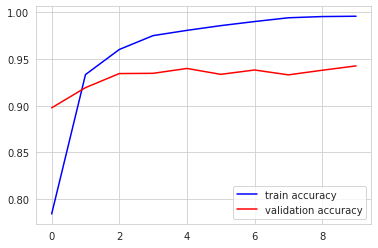

In [90]:
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

### **Earliest Stopping Method**

In [69]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [70]:
history_embedding = model.fit(X_train_pad,y_train, epochs = 10, batch_size = 256, validation_data=(X_test_pad, y_test),verbose = 1,callbacks= [es, mc]  )

Epoch 1/10
58/58 [==============================] - 86s 876ms/step - loss: 0.5588 - accuracy: 0.6850 - val_loss: 0.2658 - val_accuracy: 0.8977

Epoch 00001: val_accuracy improved from -inf to 0.89773, saving model to ./model.h5
Epoch 2/10
58/58 [==============================] - 49s 851ms/step - loss: 0.1973 - accuracy: 0.9323 - val_loss: 0.2063 - val_accuracy: 0.9193

Epoch 00002: val_accuracy improved from 0.89773 to 0.91933, saving model to ./model.h5
Epoch 3/10
58/58 [==============================] - 49s 850ms/step - loss: 0.1198 - accuracy: 0.9604 - val_loss: 0.1865 - val_accuracy: 0.9344

Epoch 00003: val_accuracy improved from 0.91933 to 0.93437, saving model to ./model.h5
Epoch 4/10
58/58 [==============================] - 49s 850ms/step - loss: 0.0772 - accuracy: 0.9775 - val_loss: 0.1978 - val_accuracy: 0.9346

Epoch 00004: val_accuracy improved from 0.93437 to 0.93465, saving model to ./model.h5
Epoch 5/10
58/58 [==============================] - 50s 856ms/step - loss: 0.06

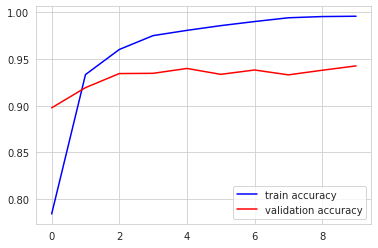

In [74]:
# lets draw learning curve 

plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()


Logistic Regression model accuracy for test data is  0.9518731200437517

Logistic Regression model average_precision of the tyest data is 0.9163125523041624

MultinomialNB model accuracy for the test data set is  0.8887065901011758

MultinomialNB model average_precision of the tyest data is 0.8163529542032454

SVM model accuracy for the test data set is  0.9379272627837025

SVM model average_precision for the tyest data is 0.8875996563855276


### **Conclusion**



Out of our discussion Logisticregredssion model has good accuracy as well as the average precision rather than deep learning model like Bidirectional LSTM.